In [11]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import random
import statistics as st

## engine/features 에서 변수생성 class 불러오기

In [12]:
from features_yj import features_p1

/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/yeojin/Desktop/2020bigcon/bigcon_2020_mmmz/engine/features_yj.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [13]:
t = features_p1()
train = t.run_all()

/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/yeojin/Desktop/2020bigcon/bigcon_2020_mmmz/engine/features_yj.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [16]:
train.shape

(35379, 36)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 38303
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   방송일시          35379 non-null  datetime64[ns]
 1   노출(분)         20403 non-null  float64       
 2   마더코드          35379 non-null  object        
 3   상품코드          35379 non-null  object        
 4   상품명           35379 non-null  object        
 5   상품군           35379 non-null  object        
 6   판매단가          35379 non-null  float64       
 7   취급액           35379 non-null  float64       
 8   exposed       35379 non-null  float64       
 9   ymd           35379 non-null  object        
 10  volume        35379 non-null  float64       
 11  years         35379 non-null  object        
 12  months        35379 non-null  object        
 13  days          35379 non-null  object        
 14  hours         35379 non-null  object        
 15  weekdays      35379 non-null  object

In [24]:
train.years = train.years.astype(int).astype(str)
train.months = train.months.astype(int).astype(str)
train.days = train.days.astype(int).astype(str)
train.hours = train.hours.astype(int).astype(str)
train.hours_inweek = train.hours_inweek.astype(int).astype(str)
train.japp = train.japp.astype(int).astype(str)
train.sales_power = train.sales_power.astype(float)

## 취급액 분포 보기

count    3.537900e+04
mean     2.310241e+07
std      2.005790e+07
min      1.030000e+05
25%      7.998500e+06
50%      1.732600e+07
75%      3.276300e+07
max      3.220090e+08
Name: 취급액, dtype: float64


/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/envs/

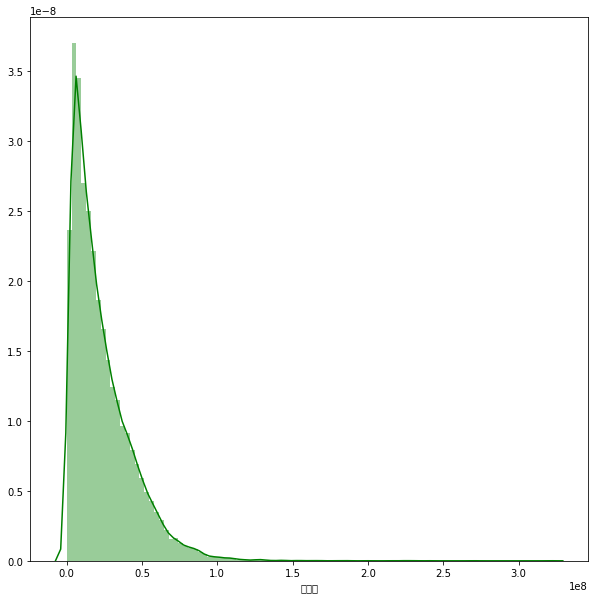

In [19]:
print(train['취급액'].describe())
plt.figure(figsize=(10, 10))
sns.distplot(train['취급액'], color='g', bins=100, hist_kws={'alpha': 0.4});

<AxesSubplot:xlabel='취급액'>

/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/envs/

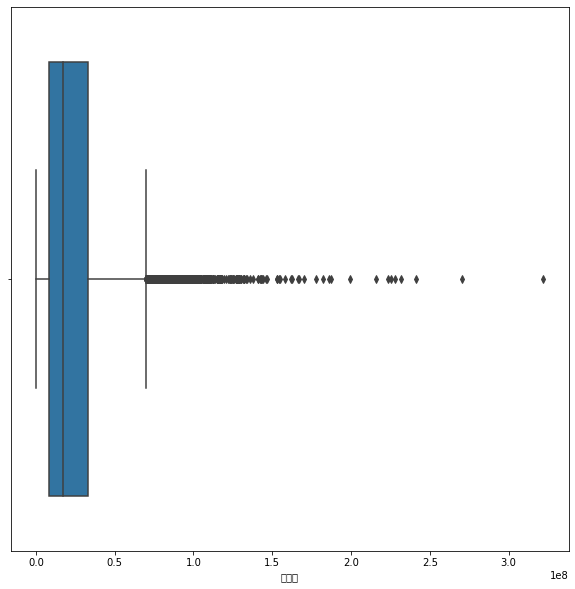

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(train['취급액'])

### 분포가 매우 skewed 하므로 매우 높은 값은 모델이 예측하기 힘들 수 있다

## 판매단가 분포 보기

count    3.537900e+04
mean     3.878590e+05
std      6.264088e+05
min      1.280000e+04
25%      5.900000e+04
50%      9.900000e+04
75%      3.990000e+05
max      7.930000e+06
Name: 판매단가, dtype: float64


/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/env

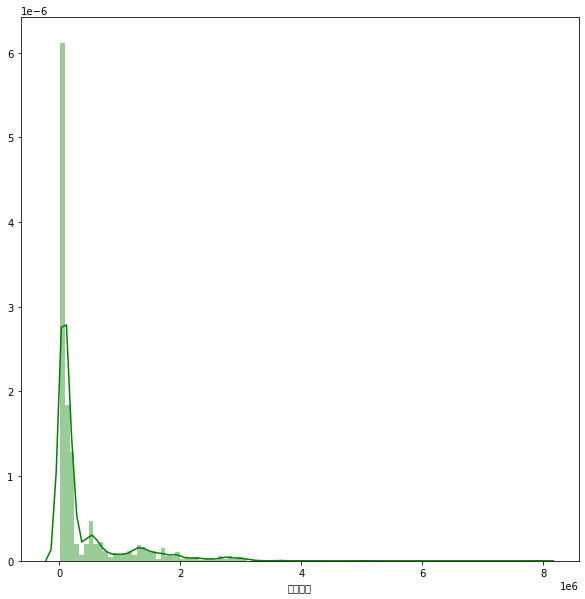

In [26]:
print(train['판매단가'].describe())
plt.figure(figsize=(10, 10))
sns.distplot(train['판매단가'], color='g', bins=100);

<AxesSubplot:xlabel='판매단가'>

/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/env

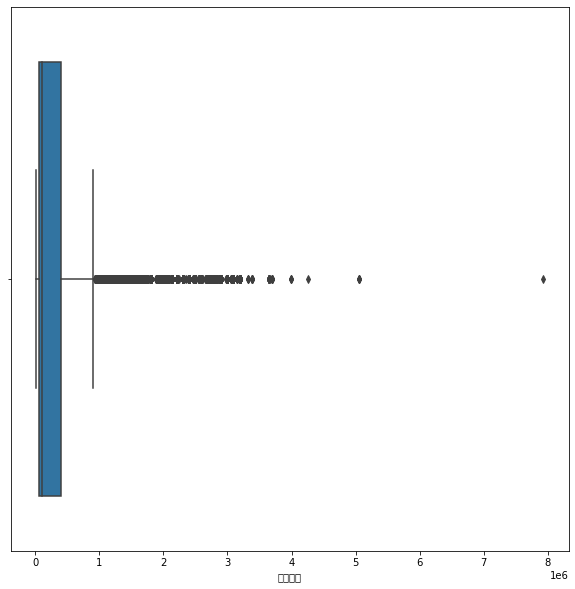

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(train['판매단가'])

## volume 분포 보기

count    35379.000000
mean       314.797301
std        427.826506
min          1.302349
25%         26.283654
50%        130.000000
75%        451.719941
max       8070.401003
Name: volume, dtype: float64


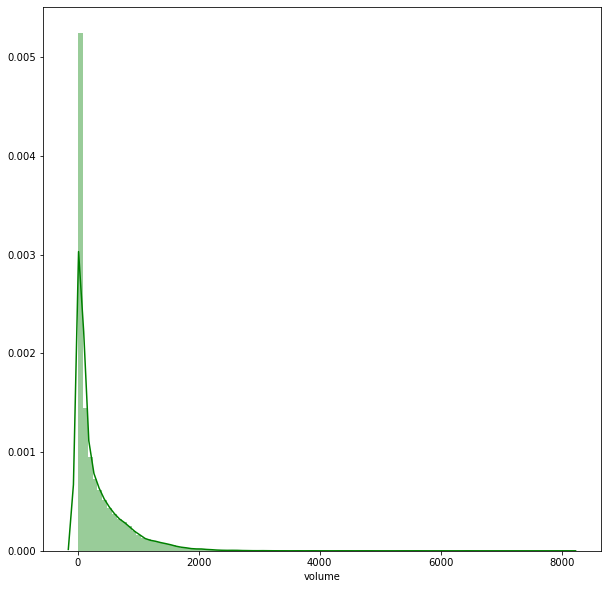

In [28]:
print(train['volume'].describe())
plt.figure(figsize=(10, 10))
sns.distplot(train['volume'], color='g', bins=100);

<AxesSubplot:xlabel='volume'>

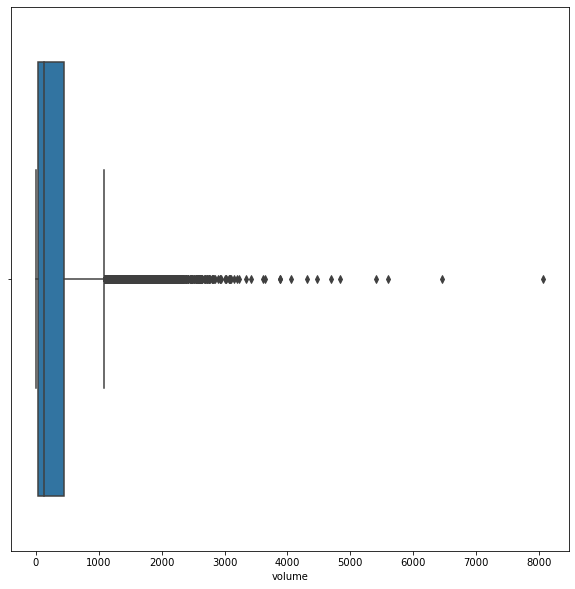

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(train['volume'])

## 노출(분) 분포 보기

count    20403.000000
mean        20.047052
std          3.108224
min          2.000000
25%         20.000000
50%         20.000000
75%         20.000000
max         40.000000
Name: 노출(분), dtype: float64


/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/envs/

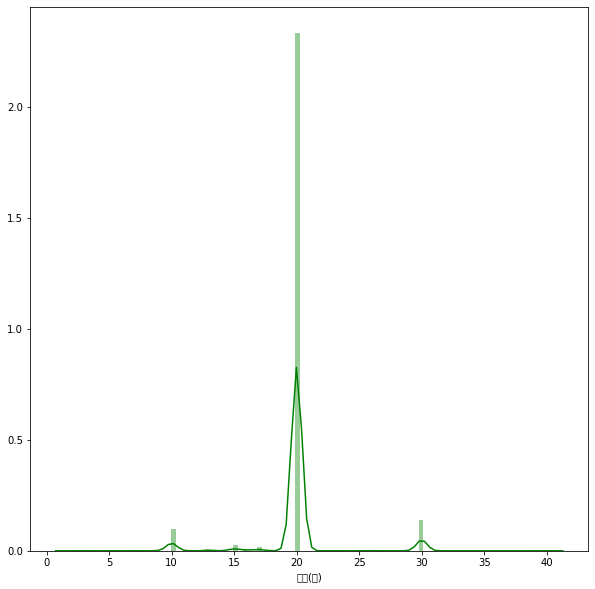

In [31]:
print(train['노출(분)'].describe())
plt.figure(figsize=(10, 10))
sns.distplot(train['노출(분)'], color='g', bins=100);

<AxesSubplot:xlabel='노출(분)'>

/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/envs/

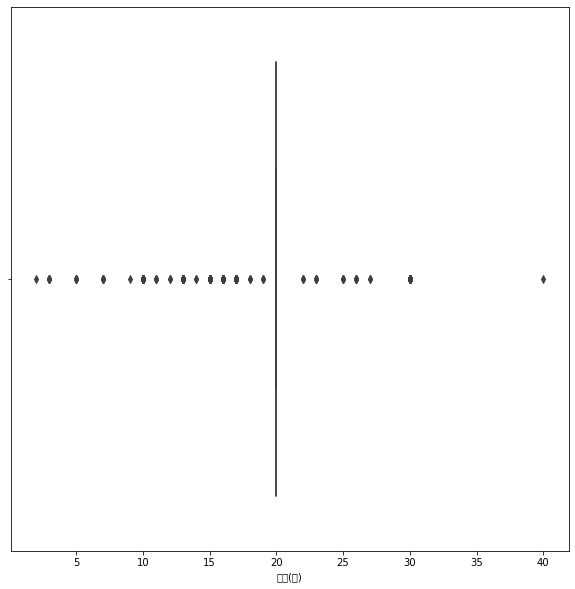

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(train['노출(분)'])

### 걍 범주형으로 봐도 될듯

In [34]:
train['노출(분)'] = train['노출(분)'].astype(str)

## sales_power 분포 보기

count    35379.000000
mean         0.969556
std          2.638439
min          0.006533
25%          0.040412
50%          0.135035
75%          0.680430
max         57.250395
Name: sales_power, dtype: float64


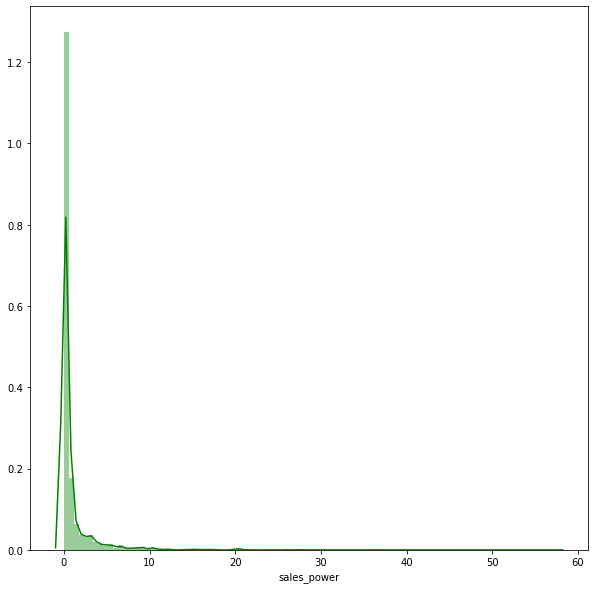

In [35]:
print(train['sales_power'].describe())
plt.figure(figsize=(10, 10))
sns.distplot(train['sales_power'], color='g', bins=100);

<AxesSubplot:xlabel='sales_power'>

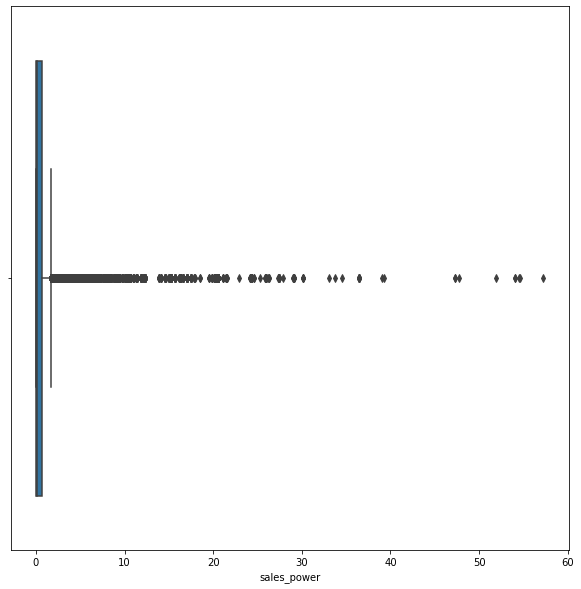

In [36]:
plt.figure(figsize=(10,10))
sns.boxplot(train['sales_power'])

/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50743 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yeojin/anaconda3/e

<Figure size 720x720 with 0 Axes>

/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50743 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yeojin/anaconda3/envs/yjenv/

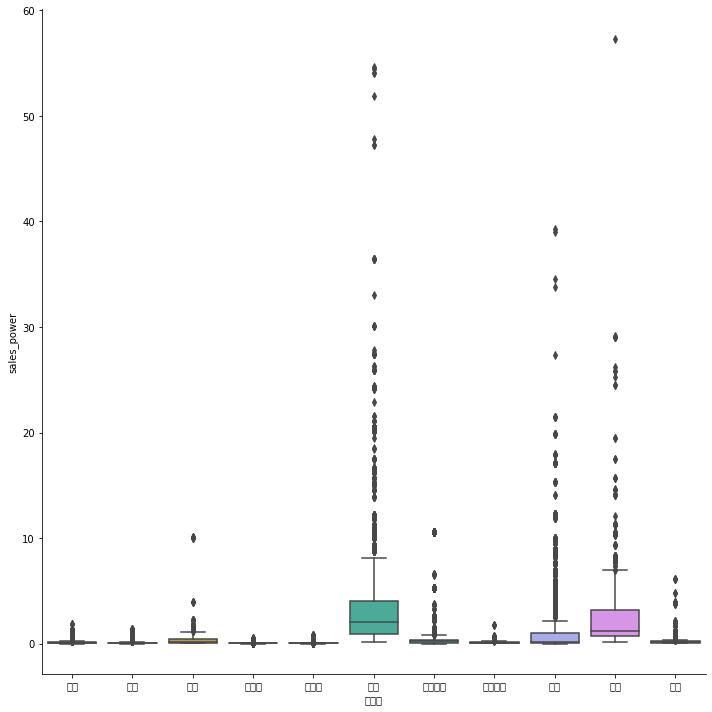

In [38]:
plt.figure(figsize=(10,10))
hh1 = sns.catplot(data = train, x = '상품군', y = 'sales_power', kind = 'box', height = 10)

In [39]:
train['상품군'].unique()

array(['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '가구',
       '침구'], dtype=object)

#### 가구 침구 건강기능

In [ ]:
train_float = 
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()